In [2]:
# 作业要求
# 1、读取数据，以“豆瓣评分”为标准，看看电影评分分布，及烂片情况
# 要求：
# ① 读取数据“moviedata.xlsx”
# ② 查看“豆瓣评分”数据分布，绘制直方图、箱型图
# ③ 判断“烂片标准” → 这里以上四分位数（该样本中所有数值由小到大排列后第25%的数字）评分为“烂片标准”
# ⑤ 筛选出烂片数据，并做排名，找到TOP20
# 2、什么题材的电影烂片最多？
# 要求：
# ① 按照“类型”字段分类，筛选不同电影属于什么题材
# ② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
# ③ 将得到的题材烂片比例TOP20制作散点图 → 横坐标为“题材”类型，纵坐标为烂片比例，点大小为样本数量
#    ** 用bokeh制图
#    ** 按照烂片比例做降序排列
# 提示：
# ① 删除“类型”字段空值的数据
# ② 由于一个电影“类型”会有多个，这里需要将一个电影每个“类型”都识别出来，在统计某个题材时都需要计算，例如：
#    如果一个电影的类型为：“喜剧/爱情”，则在计算“喜剧”、“爱情”题材的烂片比例时，都需要将该电影算上
# ③ 注意类型字段中，要删除空格字符
# ④ bokeh图设置点大小，这里通过 开方减小数据差距 → size = count**0.5*系数
# 3、和什么国家合拍更可能产生烂片？
# 要求：
# ① 按照“制片国家/地区”字段分类，筛选不同电影的制片地
# ② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
# 提示：
# ① 删除“制片国家/地区”字段空值的数据
# ② 删除“制片国家/地区”中不包括“中国大陆”的数据
# ③ 制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据
# ④ 筛选合作电影大于等于3部以上的国家

# 4、卡司数量是否和烂片有关？
# 要求：
# ① 计算每部电影的主演人数
# ② 按照主演人数分类，并统计烂片率
#    ** 分类：'1-2人','3-4人','5-6人','7-9人','10以上'
# ③ 查看烂片比例最高的演员TOP20
# 提示：
# ① 通过“主演”字段内做分列来计算主演人数
# ② 需要分别统计不同主演人数的电影数量及烂片数量，再计算烂片比例
# ③ 这里可以按照明星再查看一下他们的烂片率，比如：吴亦凡、杨幂、黄晓明、甄子丹、刘亦菲、范冰冰....

# 5、不同导演每年电影产量情况是如何的？
# 要求：
# ① 通过“上映日期”筛选出每个电影的上映年份
# ② 查看不同导演的烂片比例、这里去除掉拍过10次电影以下的导演
# ③ 查看不同导演每年的电影产量制作散点图 → 横坐标为年份，纵坐标为每年电影平均分，点大小该年电影数量
#    ** 用bokeh制图
#    ** 横坐标限定为2007-2017年
#    ** 绘制散点图只需要用产出过烂片的导演数据
# 提示：
# ① 注意要删除“上映日期”中的空格字符
# ② 绘制图表时，分开建立数据绘制


KstestResult(statistic=0.06648180768432027, pvalue=2.352439415553853e-05)


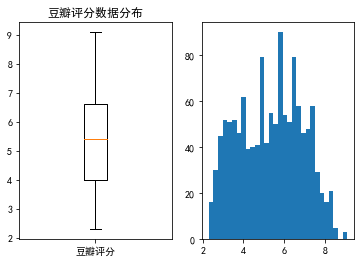

In [251]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']
moviedata=pd.read_excel(r'D:\BaiduNetdiskDownload\项目11国产烂片深度揭秘\moviedata.xlsx')
moviedata.dropna(inplace=True)
moviedata.sort_values('豆瓣评分',inplace=True)
moviedata.head()
moviedata['豆瓣评分'].describe()
fig,axes=plt.subplots(1,2)
axes[0].boxplot(moviedata['豆瓣评分'],labels=['豆瓣评分'],showfliers=True)
axes[0].set_title('豆瓣评分数据分布')
axes[1].hist(moviedata['豆瓣评分'],30)
# axes[1].plot(moviedata['豆瓣评分'],'--')
fig.show()
s=moviedata.describe()

# 正太性检验
print(stats.kstest(moviedata['豆瓣评分'],'norm',(s.loc['mean','豆瓣评分'],s.loc['std','豆瓣评分'])))




In [91]:
sta_value=s.loc['25%','豆瓣评分']
bad_movie=moviedata[moviedata['豆瓣评分']<sta_value]
# bad_movie.head()
bad20_movie=bad_movie.iloc[:20,:]
bad20_movie

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
375,找个高富帅？,659.0,2.3,2015-01-16(中国大陆),徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞,中国大陆,找个高富帅 / 谈婚论嫁18天 / Who's the One,陈童,90分钟,喜剧 / 爱情,陈童 / 张惠鑫,汉语普通话,0.023,0.000,0.014,0.050,0.913
1155,B区32号,5331.0,2.3,2011-06-03(中国大陆),邓紫衣 / 唐宸禹 / 李锐,中国大陆,"No. 32, B District",吕建民,89分钟,剧情 / 惊悚 / 恐怖,张二,汉语普通话,0.021,0.004,0.011,0.045,0.918
67,不死之身,204.0,2.4,2016-06-28,吴启华 / 吕颂贤 / 邵传勇,中国大陆,盗墓笔记2016,邵传勇,81分钟,剧情 / 爱情 / 奇幻,彭燕雯,汉语普通话,0.037,0.000,0.007,0.030,0.925
188,星探 色模,422.0,2.4,2015-10-22(香港) / 2015-12-18(广东省),艾美琦 / 周柏豪 / 赵硕之 / 贾晓晨 / 陈百祥 / 罗家英 / 曹查理 / 戴梦...,香港,Super Models,罗慧敏 / 仁杰,93分钟,喜剧,万力 / 谭鸿,粤语,0.000,0.000,0.020,0.138,0.842
284,超能兔战队,499.0,2.4,2015-05-30(中国大陆),刘红韵 / 李旭乔 / 白文显 / 申克 / 宋磊 / 周岩 / 李思娴 / 张子焜 / ...,中国大陆,咔兔 / 超能兔第一部 / Rabbit Hero,傅燕,80分钟,喜剧 / 科幻 / 动画,柯德涛,汉语普通话,0.028,0.012,0.012,0.037,0.910
216,少年杨靖宇,76.0,2.4,2015-09-03(中国大陆),叶艺城 / 温佳翼 / 马新皓 / 杜旭东 / 栗思涵,中国大陆,The Young Yang Jingyu,张文艺,102分钟,剧情 / 儿童,张文艺 / 闫超,汉语普通话,0.043,0.000,0.000,0.043,0.913
471,青春.com,249.0,2.4,2014-08-29(中国大陆),古丽娜 / 曲国强 / 孙夕尧 / 严萌 / 陶玉洁 / 卢小璐 / 马一傲,中国大陆,黑幕 / Youth.com,马雍,90分钟,剧情 / 爱情 / 悬疑,潘富荣,汉语普通话,0.030,0.000,0.006,0.061,0.902
824,南泥湾,673.0,2.4,2013-03-01(中国大陆),彭丹 / 任帅 / 姬他,中国大陆,On The Nan Ni Wan Frontier,彭丹,110分钟,剧情 / 历史 / 战争,王兵 / 彭丹,汉语普通话,0.029,0.007,0.009,0.033,0.922
181,幸福很囧,175.0,2.4,2015-10-29(中国大陆),章小军 / 张希爱 / 慕钰华 / 姚红军 / 卢小璐 / 孙绽 / 邓杨宁 / 裴妤辰 ...,中国大陆 / 台湾,Happiness Is Very Embarrassing,马雍,94分钟,喜剧 / 爱情 / 家庭,钟田明,汉语普通话,0.034,0.000,0.009,0.052,0.905
820,雷锋的微笑,924.0,2.4,2013-03-05(中国大陆),万思维 / 唐国强 / 徐箭 / 巫刚 / 李幼斌 / 宋春丽 / 冯恩鹤 / 马晓伟 /...,中国大陆,The Sweet Smile,张玉中,92分钟,剧情 / 传记,赵峻防 / 张玉中,汉语普通话,0.028,0.003,0.022,0.029,0.917


In [182]:
# 2、什么题材的电影烂片最多？
# 要求：
# ① 按照“类型”字段分类，筛选不同电影属于什么题材
# ② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
# ③ 将得到的题材烂片比例TOP20制作散点图 → 横坐标为“题材”类型，纵坐标为烂片比例，点大小为样本数量
#    ** 用bokeh制图
#    ** 按照烂片比例做降序排列
# 提示：
# ① 删除“类型”字段空值的数据
# ② 由于一个电影“类型”会有多个，这里需要将一个电影每个“类型”都识别出来，在统计某个题材时都需要计算，例如：
#    如果一个电影的类型为：“喜剧/爱情”，则在计算“喜剧”、“爱情”题材的烂片比例时，都需要将该电影算上
# ③ 注意类型字段中，要删除空格字符
# ④ bokeh图设置点大小，这里通过 开方减小数据差距 → size = count**0.5*系数

moviedata.dropna(subset=['类型'],inplace=True)
moviedata.head()
type_data = moviedata.groupby('类型')['豆瓣评分']
lst = moviedata['类型'].str.replace(' ','').str.split('/').tolist()
lst_type = []
for i in lst:
    lst_type.extend(i)

lst_type = list(set(lst_type))
lst_type
lst_movie=[]
for i in lst_type:
    dic_type={}
    dic_type['类型']=i
    dic_type['类型数量']=len(moviedata[moviedata['类型'].str.contains(i)])
    dic_type['烂片比例']=len(bad_movie[bad_movie['类型'].str.contains(i)])/len(moviedata[moviedata['类型'].str.contains(i)])
    lst_movie.append(dic_type)
type_movie = pd.DataFrame(lst_movie)
type_movie.sort_values('烂片比例',ascending=False,inplace=True)
type20_movie = type_movie.iloc[:20]
type20_movie

,类型,类型数量,烂片比例
1,惊悚,156,0.512821
0,歌舞,2,0.500000
15,黑色电影,2,0.500000
2,恐怖,46,0.478261
14,情色,7,0.428571
9,悬疑,179,0.391061
8,儿童,31,0.322581
17,奇幻,65,0.307692
24,冒险,62,0.306452
10,喜剧,414,0.294686


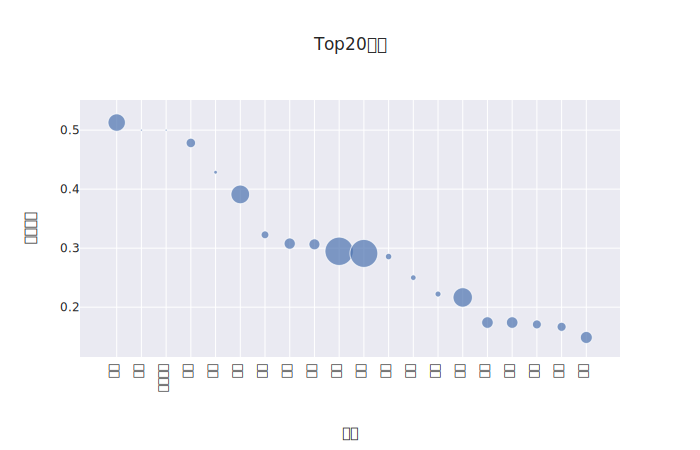

In [132]:
fig = px.scatter(type20_movie,x='类型',y='烂片比例',size='类型数量',template='seaborn',title='Top20烂片')
fig.show(renderer='svg')

In [184]:
# 3、和什么国家合拍更可能产生烂片？
# 要求：
# ① 按照“制片国家/地区”字段分类，筛选不同电影的制片地
# ② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
# 提示：
# ① 删除“制片国家/地区”字段空值的数据
# ② 删除“制片国家/地区”中不包括“中国大陆”的数据
# ③ 制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据
# ④ 筛选合作电影大于等于3部以上的国家

moviedata.dropna(subset=['制片国家/地区'],inplace=True)
moviedata.head()
country_data = moviedata['制片国家/地区'].str.replace(' ','').str.split('/').tolist()
lst_country=[]
for i in country_data:
    lst_country.extend(i)
data_lst = list(set(lst_country))
data_lst.remove('中国大陆')
data_lst.remove('中国')
data_lst.remove('台湾')
data_lst.remove('香港')
lst_area=[]
for i in data_lst:
    dic_data={}
    dic_data['合拍制片地']=i
    dic_data['合拍数量']=len(moviedata[moviedata['制片国家/地区'].str.contains(i)])
    dic_data['合拍烂片数量']=len(bad_movie[bad_movie['制片国家/地区'].str.contains(i)])
    lst_area.append(dic_data)
area_data=pd.DataFrame(lst_area)
area_data=area_data[area_data['合拍数量']>3]
area_data['合拍烂片比例']=area_data['合拍烂片数量']/area_data['合拍数量']
area_data.sort_values('合拍烂片比例',ascending=False)

    

,合拍制片地,合拍数量,合拍烂片数量,合拍烂片比例
0,马来西亚,5,1,0.200000
10,韩国,16,3,0.187500
7,德国,6,1,0.166667
13,美国,17,2,0.117647
2,日本,14,1,0.071429
5,法国,14,1,0.071429
1,加拿大,5,0,0.000000
4,新加坡,5,0,0.000000


In [212]:
# 4、卡司数量是否和烂片有关？
# 要求：
# ① 计算每部电影的主演人数
# ② 按照主演人数分类，并统计烂片率
#    ** 分类：'1-2人','3-4人','5-6人','7-9人','10以上'
# ③ 查看烂片比例最高的演员TOP20
# 提示：
# ① 通过“主演”字段内做分列来计算主演人数
# ② 需要分别统计不同主演人数的电影数量及烂片数量，再计算烂片比例
# ③ 这里可以按照明星再查看一下他们的烂片率，比如：吴亦凡、杨幂、黄晓明、甄子丹、刘亦菲、范冰冰....

moviedata['卡司'] = moviedata['主演'].str.split('/')
moviedata['卡司']
moviedata['卡司数量']=moviedata['卡司'].apply(lambda x:len(x))
bins=[1,2,4,6,9,20,]
moviedata['主演人数']=pd.cut(moviedata['卡司数量'],bins,labels=['1-2人','3-4人','5-6人','7-9人','10人以上'])
moviedata_gp = moviedata.groupby('主演人数').count()['电影名称']
moviedata_lp = moviedata[moviedata['豆瓣评分']<sta_value].groupby('主演人数').count()['电影名称']
moviedata_count = pd.merge(moviedata_gp,moviedata_lp,on='主演人数')
moviedata_count.reset_index(inplace=True)
moviedata_count.columns=['主演人数','总数','烂片数']
moviedata_count['烂片比例']=moviedata_count['烂片数']/moviedata_count['总数']
moviedata_count.sort_values('烂片比例',ascending=False)

,主演人数,总数,烂片数,烂片比例
3,7-9人,324,107,0.330247
2,5-6人,285,73,0.256140
4,10人以上,319,74,0.231975
0,1-2人,62,10,0.161290
1,3-4人,255,40,0.156863


In [233]:
name_data=[]
for i in moviedata['主演'].str.split('/'):
    name_data.extend(i)
name_data=list(set(name_data))
lst_name=[]
for j in name_data:
    name={}
    name['演员']=j
    name['出演数']=len(moviedata[moviedata['主演'].str.contains(j)])
    name['烂片数']=len(bad_movie[bad_movie['主演'].str.contains(j)])
    lst_name.append(name)
act_data=pd.DataFrame(lst_name)
act_data['烂片比例']=act_data['烂片数']/act_data['出演数']

print(act_data[act_data['演员'].str.contains('鹿晗')],'\n--------')

act_data.sort_values('烂片比例',ascending=False).iloc[:20]
    

        演员  出演数  烂片数  烂片比例
3366   鹿晗     3    0   0.0 
--------


,演员,出演数,烂片数,烂片比例
1702,安娜塔莉亚·沙迪科娃,1,1,1.0
4814,呱呱,1,1,1.0
1339,叶思浵,1,1,1.0
4708,董玉峰,1,1,1.0
2847,马恺曼,1,1,1.0
4715,李依馨,1,1,1.0
4717,陈美行,2,2,1.0
1325,张皓伦,1,1,1.0
4722,蔡纬嘉,1,1,1.0
3756,王诗乔,1,1,1.0


In [252]:
# 5、不同导演每年电影产量情况是如何的？
# 要求：
# ① 通过“上映日期”筛选出每个电影的上映年份
# ② 查看不同导演的烂片比例、这里去除掉拍过10次电影以下的导演
# ③ 查看不同导演每年的电影产量制作散点图 → 横坐标为年份，纵坐标为每年电影平均分，点大小该年电影数量
#    ** 用bokeh制图
#    ** 横坐标限定为2007-2017年
#    ** 绘制散点图只需要用产出过烂片的导演数据
# 提示：
# ① 注意要删除“上映日期”中的空格字符
# ② 绘制图表时，分开建立数据绘制

moviedata['上映年份'] = moviedata['上映日期'].str.replace(' ','').str.slice(0,4)

dir_data = moviedata[['电影名称','上映年份','导演','豆瓣评分']]
lst_dir=[]
for i in dir_data['导演'].str.replace(' ','').str.split('/'):
    lst_dir.extend(i)
lst_dir = list(set(lst_dir))
lst_director=[]
for j in lst_dir:
    dir={}
    dir['导演']=j
    dir['执导数量']=len(dir_data[dir_data['导演'].str.contains(j)])
    dir['烂片数量']=len(dir_data[(dir_data['导演'].str.contains(j))&(dir_data['豆瓣评分']<sta_value)])
    lst_director.append(dir)
director_data=pd.DataFrame(lst_director)
director_data=director_data[director_data['执导数量']>=10]
director_data['烂片比例']=director_data['烂片数量']/director_data['执导数量']
director_data

,导演,执导数量,烂片数量,烂片比例
224,海涛,12,0,0.000000
451,胡明凯,14,0,0.000000
927,王晶,17,2,0.117647


In [ ]:
count_data=dir_data